In [930]:
## Comparison of Rape Statistics in India
## We will need BeautifulSoup
from bs4 import BeautifulSoup
from tabulate import tabulate
import requests
import pandas as pd
import html5lib
wiki_url = 'https://en.wikipedia.org/wiki/Rape_statistics#Bangladesh'
table_id = 'wikitable sortable'
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', attrs={'class':table_id}).tbody
rows = table.find_all('tr')
rows
## This rows shows the rape statistics for different country

[<tr>
 <th>
 </th>
 <th colspan="8" style="text-align: center;"><b>Total count</b>
 </th>
 <th colspan="8" style="text-align: center;"><b>Rate per 100,000 population</b>
 </th></tr>,
 <tr>
 <th><b>Country/territory</b>
 </th>
 <th>2003
 </th>
 <th>2004
 </th>
 <th>2005
 </th>
 <th>2006
 </th>
 <th>2007
 </th>
 <th>2008
 </th>
 <th>2009
 </th>
 <th>2010
 </th>
 <th>2003
 </th>
 <th>2004
 </th>
 <th>2005
 </th>
 <th>2006
 </th>
 <th>2007
 </th>
 <th>2008
 </th>
 <th>2009
 </th>
 <th>2010
 </th></tr>,
 <tr>
 <td>Kenya</td>
 <td></td>
 <td>1440</td>
 <td>1365</td>
 <td>1291</td>
 <td>876</td>
 <td>735</td>
 <td>847</td>
 <td></td>
 <td></td>
 <td>4.1</td>
 <td>3.8</td>
 <td>3.5</td>
 <td>2.3</td>
 <td>1.9</td>
 <td>2.1</td>
 <td>
 </td></tr>,
 <tr>
 <td>Mauritius</td>
 <td>53</td>
 <td>40</td>
 <td>38</td>
 <td>64</td>
 <td>77</td>
 <td>69</td>
 <td>57</td>
 <td>51</td>
 <td>4.3</td>
 <td>3.2</td>
 <td>3.0</td>
 <td>5.1</td>
 <td>6.0</td>
 <td>5.4</td>
 <td>4.4</td>
 <td>3.9
 </td></tr>,
 

In [931]:
##To get all the values for a particular country
columns = [v.text.replace('\n', '') for v in rows[57].find_all('td')]
columns1 = [v.text.replace('\n', '') for v in rows[58].find_all('td')]
columns2 = [v.text.replace('\n', '') for v in rows[43].find_all('td')]
columns3 = [v.text.replace('\n', '') for v in rows[60].find_all('td')]
#country = rows[57]
#country
df = pd.DataFrame(columns[0:9], columns2[0:9])

##There are some value missing. So, we have eliminated those
columns= columns[2:9]
columns2 = columns2[1:9]
year = ['2002','2003', '2004','2005', '2006','2007','2008', '2009','2010']

#df1 = [columns2[1:9], year]
#df1[::-1]
#rev= columns2[8:0:-1]

#year[8:0:-1]
#yr=[]
year = [int(i) for i in year] 

# values were in string type. So we have to convert to integer 
columns = [int(i) for i in columns]
#columns
columns2 = [int(i) for i in columns2]
#columns2

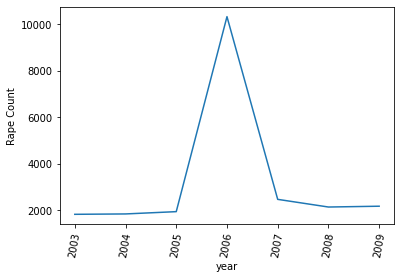

In [932]:
# plot for India
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
plt.plot(year[1:8],columns)
#ax.bar(year,columns[2:9])
plt.xlabel('year')
plt.ylabel("Rape Count")
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.show()

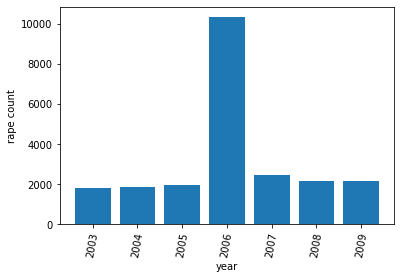

In [933]:
#Bar plot for India
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
plt.bar(year[1:8],columns)
#ax.bar(year,columns[2:9])
plt.xlabel('year')
plt.ylabel('rape count')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.show()

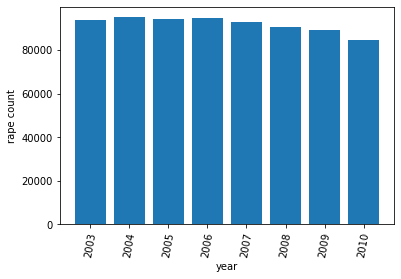

In [934]:
#Bar plot for USA
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
plt.bar(year[1:9],columns2)
#ax.bar(year,columns[2:9])
plt.xlabel('year')
plt.ylabel('rape count')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.show()

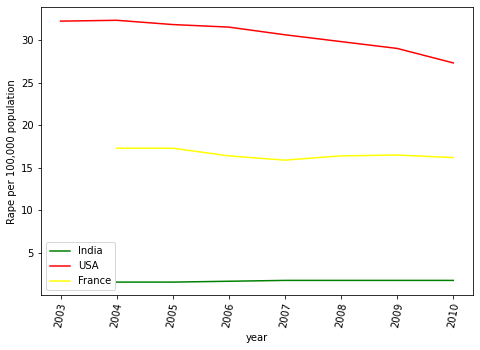

In [935]:
#Comparison of different country
columns = [v.text.replace('\n', '') for v in rows[57].find_all('td')]
columns1 = [v.text.replace('\n', '') for v in rows[58].find_all('td')]
columns2 = [v.text.replace('\n', '') for v in rows[43].find_all('td')]
columns3 = [v.text.replace('\n', '') for v in rows[60].find_all('td')]
columns4 = [v.text.replace('\n', '') for v in rows[112].find_all('td')]
columns = columns[10:]
columns
columns = [float(i) for i in columns]
columns4 = columns4[9:-1]

year = [2003, 2004,2005,2006,2007,2008,2009,2010]
columns
columns2 = columns2[9:]
columns2 = [float(i) for i in columns2]
columns2
columns4 = [float(i) for i in columns4]
columns2
#year
#Bar plot
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(year[1:9],columns,color='green',label='India')
plt.plot(year[0:9],columns2,color='red',label='USA')
plt.plot(year[1:9],columns4,color='yellow',label='France')
#ax.bar(year[1:9],columns[0:9])
plt.xlabel('year')
plt.ylabel('Rape per 100,000 population')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.legend()
plt.show()

# We can see that Rape per 100,1000 is far greater in USA and France than India.
# But In case of USA it is gradullly decreasing whereas in India it is increasing  

In [936]:
# We will examine the statistics of sentence commuted to life. 
wiki_url = 'https://en.wikipedia.org/wiki/Capital_punishment_in_India'
table_id = 'wikitable'
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table', attrs={'class':table_id})[5].tbody
rows = table.find_all('tr')
col = [v.text for v in rows[0].find_all('th')]
df = pd.DataFrame(columns=col)
#for i in range(1, len(rows)):
   # tds=rows[i].find_all('td')
    #print(tds)
tds=[]
for i in range(0, len(rows)):
    
    tds = [v.text for v in rows[i].find_all('td')]
    #print(tds)
   
    #print(df)
    values = [v for v in tds]
    #print(values[2])
    df = df.append(pd.Series(values), ignore_index=True) 
df[1:19][2]
# We see that around 2007, the rape count in India was extremely high. We wanted to see if there is any effect of commutation on that
# We see that around 2006/2007, the commutation was fairly high.

<ipython-input-936-d81cbbfb0590>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df.append(pd.Series(values), ignore_index=True)


1      303
2      301
3      142
4      179
5     1241
6     1020
7      881
8       46
9      104
10      62
11      42
12      61
13     115
14     112
15      49
16      82
17      83
18      65
Name: 2, dtype: object

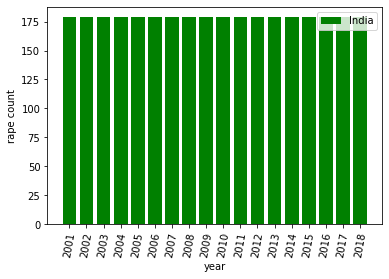

In [937]:
# We will examine the statistics of sentence commuted to life. 
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
df = [int(i) for i in df[1:19][2]]
year = ['2001','2002','2003', '2004','2005','2006','2007','2008','2009','2010','2011', '2012','2013','2014','2015','2016','2017','2018']
plt.bar(year,df[1:19][2],color='green',label='India')
#plt.plot(year[0:9],columns2,color='red',label='USA')
#plt.plot(year[1:9],columns4,color='yellow',label='France')
#ax.bar(year[1:9],columns[0:9])
plt.xlabel('year')
plt.ylabel('rape count')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.legend()
plt.show()